Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


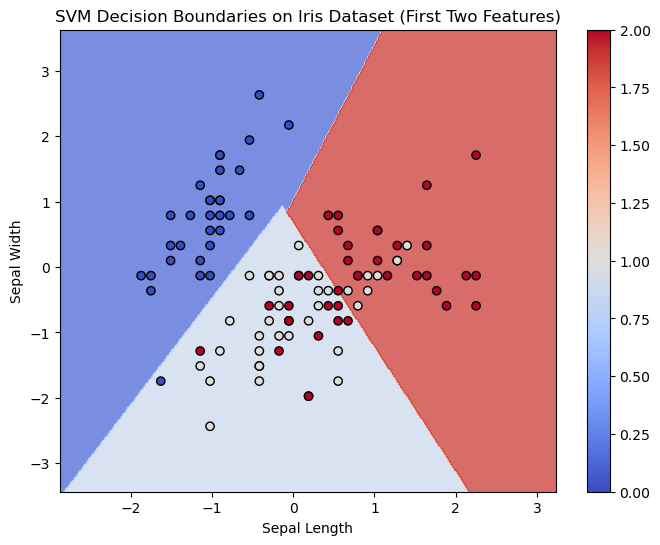

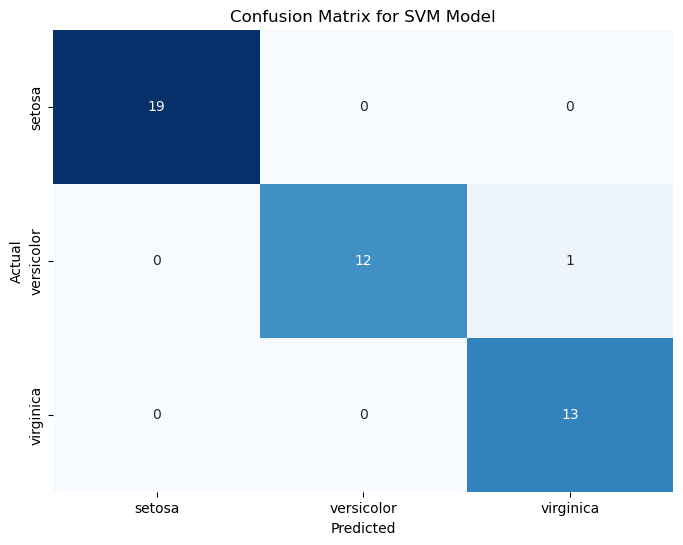

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

# Standardize the features for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Model Evaluation: Accuracy and Classification Report
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot 1: Decision Boundaries (Using only the first two features for visualization)
plt.figure(figsize=(8, 6))
X_train_2d = X_train[:, :2]  # Using the first two features (sepal length and sepal width)
svm_model_2d = SVC(kernel='linear', random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

# Create a meshgrid to plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundaries on Iris Dataset (First Two Features)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar()
plt.savefig("SVM Decision Boundaries.png") 
plt.show()

# Plot 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_svm.png") 
plt.show()